In [114]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [115]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

In [116]:
x_train.shape

(60000, 28, 28)

In [117]:
y_train.shape

(60000,)

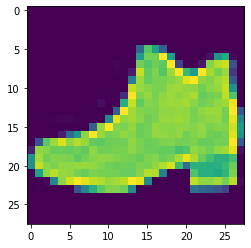

In [118]:
plt.imshow(x_train[15])
plt.show()

In [119]:
x_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   9,   6,
          0,   0,   0,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 209, 231, 248,
        252, 250, 253, 246, 206, 132,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 227, 243, 234, 234,
        248, 246, 238, 230, 234, 250, 126,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  57, 231, 213, 227, 234,
        232, 231, 235, 232, 218, 218, 222,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  90, 239, 207, 213, 236,
        235, 232, 232, 229, 210, 215, 207,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 211, 245, 229, 197, 220,
        221, 221, 222, 203, 221, 235, 222,  96,   0,   0,   0,   0,   0,
          0,   0],
       [  

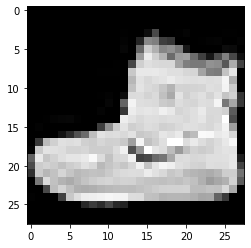

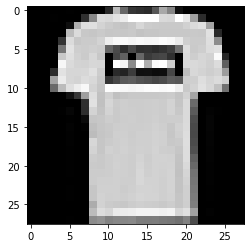

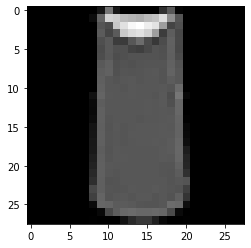

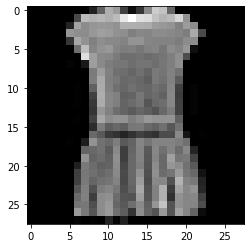

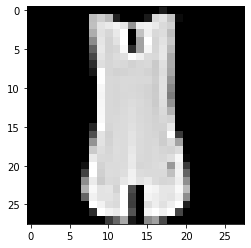

In [120]:
for i in range(5):
  plt.imshow(x_train[i],cmap='gray')
  plt.show()


In [121]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [122]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [123]:
x_train=x_train/225
x_test=x_test/225

In [124]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00444444, 0.        , 0.        , 0.        , 0.        ,
        0.18222222, 0.83555556, 0.45777778, 0.24      , 0.21333333,
        0.19111111, 0.38666667, 0.74666667, 0.59111111, 0.07111111,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00444444, 0.        ,
        0.        , 0.        , 0.21777778, 0.60444444, 0.97333333,
        0.96      , 1.01333333, 1.04888889, 1.13333333, 1.13333333,
        1.13333333, 1.13333333, 0.96444444, 0.95555556, 1.12888889,
        1.02666667, 0.71111111, 0.2       , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.06222222, 0.78222222, 0.98666667, 0.99555556, 0.94222222,
        0.90222222, 0.88      , 0.87111111, 0.88888889, 0.95555556,
        0.90666667, 0.8977

In [125]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [126]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [127]:
x_train.shape

(60000, 28, 28, 1)

In [128]:
y_train[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [129]:
model=Sequential()

In [130]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(2,2),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [131]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                18464     
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [135]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics='accuracy')


In [136]:
history=model.fit(x_train,y_train,batch_size=200,epochs=10)

Epoch 1/10
300/300 [==============================] - 26s 85ms/step - loss: 1.0916 - accuracy: 0.6206
Epoch 2/10
300/300 [==============================] - 25s 84ms/step - loss: 0.4438 - accuracy: 0.8391
Epoch 3/10
300/300 [==============================] - 25s 84ms/step - loss: 0.3859 - accuracy: 0.8612
Epoch 4/10
300/300 [==============================] - 25s 85ms/step - loss: 0.3572 - accuracy: 0.8704
Epoch 5/10
300/300 [==============================] - 25s 84ms/step - loss: 0.3367 - accuracy: 0.8793
Epoch 6/10
300/300 [==============================] - 25s 84ms/step - loss: 0.3219 - accuracy: 0.8831
Epoch 7/10
300/300 [==============================] - 25s 84ms/step - loss: 0.3044 - accuracy: 0.8906
Epoch 8/10
300/300 [==============================] - 25s 84ms/step - loss: 0.2951 - accuracy: 0.8929
Epoch 9/10
300/300 [==============================] - 26s 85ms/step - loss: 0.2885 - accuracy: 0.8963
Epoch 10/10
300/300 [==============================] - 25s 85ms/step - loss: 0.273

In [137]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 2s 7ms/step - loss: 0.3057 - accuracy: 0.8902


[0.3057312071323395, 0.8902000188827515]

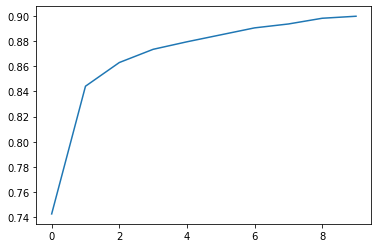

In [139]:
plt.plot(history.history['accuracy'])
plt.show()


In [140]:
prediction = model.predict(x_test)


In [148]:
print(np.argmax(np.round(prediction[250])))


9


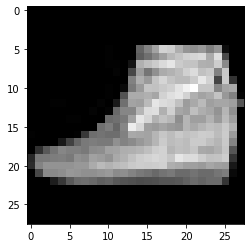

In [149]:
plt.imshow(x_test[250].reshape(28,28),cmap = 'gray')
plt.show()